In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 1.1 subject ID check

In [2]:
subject_list = pd.read_csv("/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/NN_subjects.txt", sep='\t')
subject_list2 = pd.read_csv("/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_pheno_up.csv")
subject_list3 = pd.read_csv("/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/main_pheno_up.csv")
sub_merged = pd.concat([subject_list2, subject_list3], axis=0)
sub_merged


,Unnamed: 0,subjectId,blooddrawid,age,recentDx_EvalDate,diagnosis_binary,diagnosis_multi1,batch,sex,Neutrophil,Tcell,Monocyte,Bcell,NKcell,PlasmaCell,DendriticCell,final_ADOS_CoSoTot,recentDxJ_dxCode,recentDxJ_ageMo
0,68,A3W6D,242-01,36.205,09-03-10,ASD,ASD,2,M,0.004172,0.017931,0.040513,-0.072623,-0.000438,0.027928,0.011641,15.0,ASD,36.205
1,80,A5G5M,299-01,32.066,02-03-09,ASD,ASD,2,M,0.036179,-0.028177,0.019183,0.024875,-0.057716,0.020187,-0.020063,11.0,ASD,32.066
2,13,A5M2D,129-01,32.526,03-27-08,ASD,PDDNOS,2,M,0.006200,0.010815,0.021127,-0.042200,0.001227,0.002585,-0.009940,17.0,ASD,32.526
3,25,A6L7X,151-01,43.598,07-24-09,ASD,ASD,2,M,-0.011303,0.044493,-0.005998,0.042129,-0.071666,0.004722,-0.033243,12.0,ASD,43.598
4,249,B4Z9C,624,37.749,04-05-12,TD,PrevLDDTyp,2,M,-0.011319,0.052890,-0.043108,0.066529,-0.020442,-0.038031,-0.038827,0.0,TD,37.749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,4807135011_C,Z6A9K,325-01,33.971,9/20/10 0:00,TD,ASD Features,WG6,M,-0.014417,0.046347,-0.003338,0.031161,-0.023579,-0.044945,-0.040187,7.0,TD,33.971
171,372,Z6G7S,856-01,37.125,12-06-11,ASD,ASD,1,M,-0.016810,-0.005200,-0.008820,0.073182,-0.033309,0.009854,-0.050478,13.0,ASD,37.125
172,4807258016_E,Z7W4J,155-01,46.423,3/23/10 0:00,TD,PrevLDDTyp,WG6,M,0.008556,0.000620,-0.018448,0.040078,0.008031,0.004631,-0.022913,3.0,TD,46.423
173,4807258027_F,Z8C9B,224-01,34.136,4/14/10 0:00,TD,PrevLDDTyp,WG6,M,0.028502,-0.023352,-0.012929,0.024671,-0.010466,-0.010201,-0.012341,3.0,TD,34.136


In [3]:
sub_merged[~sub_merged.subjectId.isin(set(subject_list.subjectId)  & set(sub_merged.subjectId))].diagnosis_binary.value_counts()

ASD    16
TD      6
Name: diagnosis_binary, dtype: int64

### generate perm data running code

In [4]:
for i in range(1,6):
    print("nohup Rscript myFoldRunnerFn.R /data/bokan/6_sample_score/final_testDataset_HT12_test/out"+str(i)+"/ > /data/bokan/6_sample_score/final_testDataset_HT12_test/out"+str(i)+"/log.txt &")


nohup Rscript myFoldRunnerFn.R /data/bokan/6_sample_score/final_testDataset_HT12_test/out1/ > /data/bokan/6_sample_score/final_testDataset_HT12_test/out1/log.txt &
nohup Rscript myFoldRunnerFn.R /data/bokan/6_sample_score/final_testDataset_HT12_test/out2/ > /data/bokan/6_sample_score/final_testDataset_HT12_test/out2/log.txt &
nohup Rscript myFoldRunnerFn.R /data/bokan/6_sample_score/final_testDataset_HT12_test/out3/ > /data/bokan/6_sample_score/final_testDataset_HT12_test/out3/log.txt &
nohup Rscript myFoldRunnerFn.R /data/bokan/6_sample_score/final_testDataset_HT12_test/out4/ > /data/bokan/6_sample_score/final_testDataset_HT12_test/out4/log.txt &
nohup Rscript myFoldRunnerFn.R /data/bokan/6_sample_score/final_testDataset_HT12_test/out5/ > /data/bokan/6_sample_score/final_testDataset_HT12_test/out5/log.txt &


In [5]:
import json
import matplotlib.pyplot as plt
import os.path
from os import path

In [6]:
with open('/Volumes/Work/Vahid_work/classification_newcode_data/final_classificationSet_main/feature.json') as f:
    data = json.load(f)
    

In [7]:
_the_table = pd.read_csv('/Volumes/Work/Vahid_work/classification_newcode_data/final_classificationSet_main/roc_mean.csv', index_col=0)
_the_table = _the_table.drop('sqda',axis=1)

In [8]:
five_iteration = pd.read_csv('/Volumes/Work/Vahid_work/classification_newcode_data/final_classificationSet_main/5_interation_data.csv', index_col=0)
five_iteration['route'] = ['_'.join(i.split('_')[2:]) for i in five_iteration.index.to_list()]

In [9]:
five_iteration['route']

real_1_no_no_sis                                                                                  no_no_sis
real_1_no_grn4_sis                                                                              no_grn4_sis
real_1_no_grn4Cntl_sis                                                                      no_grn4Cntl_sis
real_1_no_grn5_sis                                                                              no_grn5_sis
real_1_no_grn5Cntl_sis                                                                      no_grn5Cntl_sis
                                                                                 ...                       
real_5_varImportance_selectVnotComFair_cor_cppls                  varImportance_selectVnotComFair_cor_cppls
real_5_varImportance_selectVnotComFair_cor_zscore_no          varImportance_selectVnotComFair_cor_zscore_no
real_5_varImportance_selectVnotComFair_cor_zscore_pcr        varImportance_selectVnotComFair_cor_zscore_pcr
real_5_varImportance_selectV

In [10]:
_the_table_counts = pd.read_csv('/Volumes/Work/Vahid_work/classification_newcode_data/final_classificationSet_main/roc_counts.csv', index_col=0)
_the_table_counts = _the_table_counts.drop('sqda',axis=1)


In [11]:
_the_table_counts

,reg,logReg,lda,qda,ridgeReg,lassoReg,ridgeLogReg,lassoLogReg,elasticNetLogReg,randomForest,boosting,bagging
real_no_no_sis,5,5,5,5,5,5,5,5,5,5,5,5
real_no_grn4_sis,5,5,5,5,5,5,5,5,5,5,5,5
real_no_grn4Cntl_sis,5,5,5,5,5,5,5,5,5,5,5,5
real_no_grn5_sis,5,5,5,5,5,5,5,5,5,5,5,5
real_no_grn5Cntl_sis,5,5,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
real_varImportance_selectVnotComFair_grn3_zscore_plsr,1,1,1,1,1,1,1,1,1,1,1,1
real_varImportance_selectVnotComFair_grn3_zscore_cppls,1,1,1,1,1,1,1,1,1,1,1,1
real_varImportance_selectVnotComFair_grn3Cntl_zscore_pcr,1,1,1,1,1,1,1,1,1,1,1,1
real_varImportance_selectVnotComFair_grn3Cntl_zscore_plsr,1,1,1,1,1,1,1,1,1,1,1,1


In [12]:
# main_route_list = _the_table_counts.index.to_list()

In [13]:
f1 = ['no', 'cov_var', 'cov', 'varImportance', 'var']
f2 = ['no', 'grn', 'selectV', 'zscore', 'svm', 'GSEA', 'DE']
f3 = ['no', 'plsr', 'pcr', 'cppls', 'wgcna', 'logisticFwd','sis']
main_route_list = [i[5:] for i in _the_table_counts.index.to_list()]
# ['no', 'cov', 'var', 'cor_var', 'varImportance']
# ['no', 'cov', 'var', 'cor_var', 'varImportance']
feature_1_main = [0]*5
feature_2_main = [0]*7
feature_3_main = [0]*7
for i in main_route_list:
    _found = False
    for p1dex,p1 in enumerate(f1): 
#         print(p1)
        if i.startswith(p1):
            feature_1_main[p1dex] += 1
            temp = i[len(p1)+1:]
            _found = True
            break
    assert _found,'round1'
    _found = False
    for p2dex,p2 in enumerate(f2): 
        if temp.startswith(p2):
            feature_2_main[p2dex] += 1
            _found = True
            break
    assert _found,'round2 '+i+" "+temp
    _found = False
    for p3dex,p3 in enumerate(f3): 
        if i.endswith(p3):
            feature_3_main[p3dex] += 1
            _found = True
            break
    assert _found,'round3'

In [14]:
pd.DataFrame(data=[feature_1_main, feature_2_main, feature_3_main]).transpose()

,0,1,2
0,539.0,30.0,373.0
1,400.0,386.0,372.0
2,415.0,1516.0,372.0
3,420.0,128.0,371.0
4,527.0,0.0,149.0
5,NaN,241.0,291.0
6,NaN,0.0,373.0


## 1.1 How many interations in 5 cross-validation?

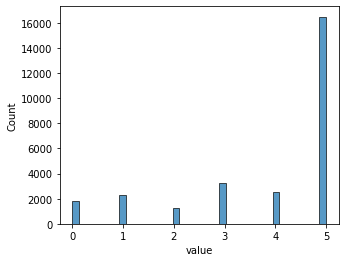

In [15]:
fig, ax = plt.subplots(figsize=(5,4))
sns.histplot(data=_the_table_counts.melt(), x="value")

In [16]:
_melt = _the_table_counts.melt()
_melt.value.value_counts()
_the_list = []
for i in set(_the_table_counts.columns):
    _the_list.append(_melt[(_melt.variable==i) & (_melt.value==5)].shape[0])
_the_list

[1396, 1355, 1322, 1402, 1355, 1396, 1355, 1355, 1396, 1396, 1396, 1355]

In [17]:
_the_table_counts = _the_table_counts[(_the_table_counts == 5).all(1)]
_the_table = _the_table[_the_table.index.isin(_the_table_counts.index)]
# _the_table_counts

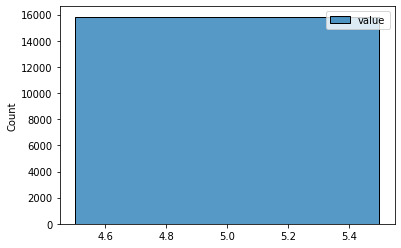

In [18]:
sns.histplot(data=_the_table_counts.melt())

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


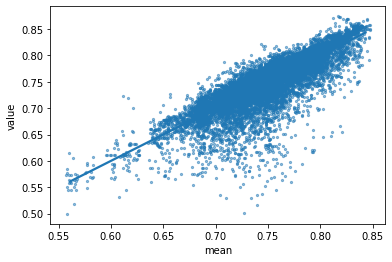

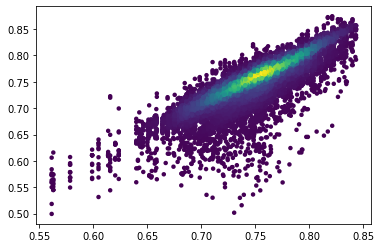

In [19]:
import itertools

_repeat_list = list(itertools.chain.from_iterable(itertools.repeat(x, 12) for x in _the_table.transpose().mean()))
_the_table_melt=_the_table.transpose().melt()
_the_table_melt['mean'] = _repeat_list
_the_table_melt

ax = sns.scatterplot()
ax = sns.regplot(x="mean", y="value", data=_the_table_melt, ci=5, scatter_kws={'s':5,'alpha':0.5}, x_jitter=0.005)
x = _the_table_melt["mean"]
y = _the_table_melt["value"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=20, edgecolor='')
plt.show()

In [20]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt


%matplotlib inline


def plot_ci_manual(t, s_err, n, x, x2, y2, ax=None):
    """Return an axes of confidence bands using a simple approach.

    Notes
    -----
    .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
    .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}

    References
    ----------
    .. [1] M. Duarte.  "Curve fitting," Jupyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb

    """
    if ax is None:
        ax = plt.gca()

    ci = t * s_err * np.sqrt(1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    ax.fill_between(x2, y2 + ci, y2 - ci, color="#b9cfe7", edgecolor="")

    return ax


def plot_ci_bootstrap(xs, ys, resid, nboot=500, ax=None):
    """Return an axes of confidence bands using a bootstrap approach.

    Notes
    -----
    The bootstrap approach iteratively resampling residuals.
    It plots `nboot` number of straight lines and outlines the shape of a band.
    The density of overlapping lines indicates improved confidence.

    Returns
    -------
    ax : axes
        - Cluster of lines
        - Upper and Lower bounds (high and low) (optional)  Note: sensitive to outliers

    References
    ----------
    .. [1] J. Stults. "Visualizing Confidence Intervals", Various Consequences.
       http://www.variousconsequences.com/2010/02/visualizing-confidence-intervals.html

    """ 
    if ax is None:
        ax = plt.gca()

    bootindex = sp.random.randint

    for _ in range(nboot):
        resamp_resid = resid[bootindex(0, len(resid) - 1, len(resid))]
        # Make coeffs of for polys
        pc = sp.polyfit(xs, ys + resamp_resid, 1)                   
        # Plot bootstrap cluster
        ax.plot(xs, sp.polyval(pc, xs), "b-", linewidth=2, alpha=3.0 / float(nboot))

    return ax

# heights = np.array([50,52,53,54,58,60,62,64,66,67,68,70,72,74,76,55,50,45,65])
# weights = np.array([25,50,55,75,80,85,50,65,85,55,45,45,50,75,95,65,50,40,45])
def customized_ci_plotting(x, y, address, fmt):
    # x = _the_table_melt['mean'].to_list()
    # y = _the_table_melt['value'].to_list()

    # Modeling with Numpy
    def equation(a, b):
        """Return a 1D polynomial."""
        return np.polyval(a, b) 

    p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
    y_model = equation(p, x)                                   # model using the fit parameters; NOTE: parameters here are coefficients

    # Statistics
    n = len(_the_table_melt['mean'])                                           # number of observations
    m = p.size                                                 # number of parameters
    dof = n - m                                                # degrees of freedom
    t = stats.t.ppf(0.975, n - m)                              # used for CI and PI bands

    # Estimates of Error in Data/Model
    resid = y - y_model                           
    chi2 = np.sum((resid / y_model)**2)                        # chi-squared; estimates error in data
    chi2_red = chi2 / dof                                      # reduced chi-squared; measures goodness of fit
    s_err = np.sqrt(np.sum(resid**2) / dof)                    # standard deviation of the error


    # Plotting --------------------------------------------------------------------
    fig, ax = plt.subplots(figsize=(8, 6))

    # Data
#     ax.plot(
#         x, y, "o", color="#b9cfe7", markersize=1, 
#         markeredgewidth=1, markeredgecolor="b", markerfacecolor="None"
#     )
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

#     fig, ax = plt.subplots()
    scatter = ax.scatter(x, y, c=z, s=5, alpha=0.3)
#     plt.show()
    handles, labels = scatter.legend_elements(prop="colors", alpha=1)
    legend2 = ax.legend(handles, labels, bbox_to_anchor = (1.01, 1), title="Density")
    ax.add_artist(legend2)
    ax.plot(x, y_model, "-", color="0.1", linewidth=1.5, alpha=0.2, label="Fit")  
    
    x2 = np.linspace(np.min(x), np.max(x), 100)
    y2 = equation(p, x2)

    # Confidence Interval (select one)
    plot_ci_manual(t, s_err, n, x, x2, y2, ax=ax)
    #plot_ci_bootstrap(x, y, resid, ax=ax)

    # Prediction Interval
    pi = t * s_err * np.sqrt(1 + 1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))   
    print(pi)
    ax.fill_between(x2, y2 + pi, y2 - pi, color="None", linestyle="--")
    ax.plot(x2, y2 - pi, "--", color="0.5", label="95% Prediction Limits")
    ax.plot(x2, y2 + pi, "--", color="0.5")


    # Figure Modifications --------------------------------------------------------
    # Borders
    ax.spines["top"].set_color("0.5")
    ax.spines["bottom"].set_color("0.5")
    ax.spines["left"].set_color("0.5")
    ax.spines["right"].set_color("0.5")
    ax.get_xaxis().set_tick_params(direction="out")
    ax.get_yaxis().set_tick_params(direction="out")
    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left() 

    # Labels
    plt.title("Fit Plot for score over mean", fontsize="14", fontweight="bold")
    plt.xlabel("Mean RUC-ROC score of each route")
    plt.ylabel("12 RUC-ROC scores of each route")
    plt.xlim(np.min(x) - 0.01, np.max(x) +0.01)

    # Custom legend
    handles, labels = ax.get_legend_handles_labels()
    display = (0, 1)
    anyArtist = plt.Line2D((0, 1), (0, 0), color="#b9cfe7")    # create custom artists
    legend = plt.legend(
        [handle for i, handle in enumerate(handles) if i in display] + [anyArtist],
        [label for i, label in enumerate(labels) if i in display] + ["95% Confidence Limits"],
        loc=9, bbox_to_anchor=(0, -0.21, 1., 0.102), ncol=3, mode="expand"
    )  
    frame = legend.get_frame().set_edgecolor("0.5")

    # Save Figure
    plt.tight_layout()
    plt.savefig(address, format=fmt, bbox_extra_artists=(legend,legend2), bbox_inches="tight")

    plt.show()
    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


[0.05147102 0.05146987 0.05146874 0.05146763 0.05146653 0.05146545
 0.05146439 0.05146335 0.05146232 0.05146132 0.05146032 0.05145935
 0.05145839 0.05145746 0.05145653 0.05145563 0.05145475 0.05145388
 0.05145303 0.05145219 0.05145138 0.05145058 0.0514498  0.05144903
 0.05144828 0.05144756 0.05144684 0.05144615 0.05144547 0.05144482
 0.05144417 0.05144355 0.05144294 0.05144236 0.05144178 0.05144123
 0.05144069 0.05144017 0.05143967 0.05143919 0.05143872 0.05143827
 0.05143784 0.05143743 0.05143703 0.05143665 0.05143629 0.05143595
 0.05143562 0.05143531 0.05143502 0.05143475 0.05143449 0.05143425
 0.05143403 0.05143383 0.05143364 0.05143347 0.05143332 0.05143319
 0.05143307 0.05143297 0.05143289 0.05143282 0.05143278 0.05143275
 0.05143274 0.05143274 0.05143277 0.05143281 0.05143287 0.05143294
 0.05143304 0.05143315 0.05143328 0.05143342 0.05143359 0.05143377
 0.05143397 0.05143418 0.05143442 0.05143467 0.05143494 0.05143522
 0.05143553 0.05143585 0.05143618 0.05143654 0.05143691 0.0514

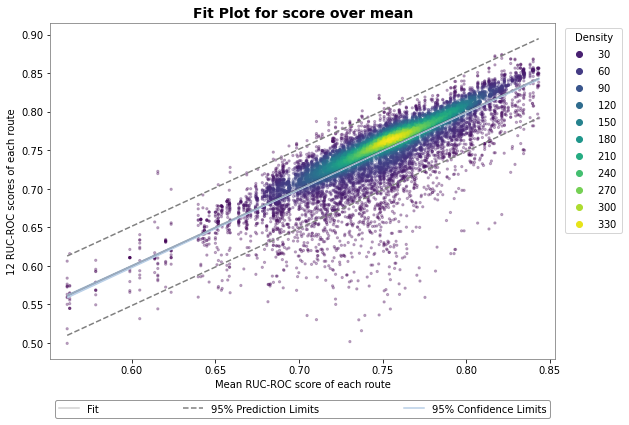

In [21]:
customized_ci_plotting(_the_table_melt["mean"], _the_table_melt["value"], address="/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/suppl_main_mean_vs_all_score.pdf", fmt='pdf')


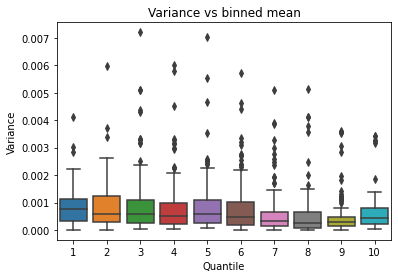

In [22]:
_temp_data= pd.DataFrame(data={'y':_the_table.transpose().var(),'x':_the_table.transpose().mean()})
_temp_data['mean_bin'] = pd.qcut(_temp_data['x'], q=10, labels=range(1,11))
fig, ax = plt.subplots(figsize=(6, 4))
# sns.scatterplot(data=_temp_data, x="mean_bin", y="y", s=8)
ax = sns.boxplot(x="mean_bin", y="y", data=_temp_data)
plt.xlabel("Quantile")
plt.ylabel("Variance")
plt.title("Variance vs binned mean")
plt.savefig("/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/suppl_main_mean_vs_score_var.pdf", format='pdf')



In [23]:
arr = _temp_data.y.to_list()
arr = sorted(arr)
print(arr[int(1320*0.025)], arr[int(1320*0.975)])

alpha = 0.05               # significance level = 5%
n = len(arr)               # sample sizes
# s2 = np.var(arr, ddof=1)   # sample variance
df = n - 1                 # degrees of freedom

upper = (n - 1) * np.mean(arr) / stats.chi2.ppf(alpha / 2, df)
lower = (n - 1) * np.mean(arr) / stats.chi2.ppf(1 - alpha / 2, df)
print(upper, lower)
# sns.histplot(_temp_data.y)
np.mean(arr)

3.3645451701250365e-05 0.0033712805671013576
0.0008117499145029742 0.0006967973547655506


0.0007509707504867486

In [24]:
feature_method_dict = {}
the_array = np.array(_the_table)
main_feature_classifier = [[],[]]
# five_iteration = np.ara
import numpy as np
for i in _the_table.index.tolist():
    _name = "_".join(i.split("_")[1:])
    for j in _the_table.columns.tolist():
        if _the_table_counts.loc[i,j] == 5:
            if _the_table.loc[i,j] > 0.8:
                if _name not in feature_method_dict.keys():
                    feature_method_dict[_name] = [j]
                else:
                    feature_method_dict[_name].append(j)
            main_feature_classifier[0].append("@".join([_name,j]))
            main_feature_classifier[1].append(_the_table.loc[i,j])
            


In [25]:
feature_method_dict

{'no_selectVcomFair_logisticFwd': ['reg',
  'lda',
  'ridgeReg',
  'lassoReg',
  'ridgeLogReg',
  'lassoLogReg',
  'elasticNetLogReg',
  'randomForest'],
 'no_selectVcomFair_sis': ['reg',
  'logReg',
  'lda',
  'ridgeReg',
  'lassoReg',
  'ridgeLogReg',
  'lassoLogReg',
  'elasticNetLogReg',
  'randomForest'],
 'no_selectVcomFair_cor_logisticFwd': ['reg',
  'lda',
  'ridgeReg',
  'lassoReg',
  'ridgeLogReg',
  'lassoLogReg',
  'elasticNetLogReg',
  'randomForest'],
 'no_selectVcomFair_cor_sis': ['reg',
  'lda',
  'ridgeReg',
  'lassoReg',
  'ridgeLogReg',
  'lassoLogReg',
  'elasticNetLogReg'],
 'no_selectVnotComHC_grn3_logisticFwd': ['ridgeReg'],
 'no_selectVnotComFair_logisticFwd': ['reg',
  'logReg',
  'lda',
  'ridgeReg',
  'lassoReg',
  'ridgeLogReg',
  'lassoLogReg',
  'elasticNetLogReg',
  'randomForest',
  'boosting',
  'bagging'],
 'no_selectVnotComFair_sis': ['reg',
  'logReg',
  'lda',
  'ridgeReg',
  'lassoReg',
  'ridgeLogReg',
  'lassoLogReg',
  'elasticNetLogReg'],
 'no_

In [26]:
# # _list = list(feature_method_dict)
# # for i in _list:
# #     if 
# _count=0
# for i in feature_method_dict:
#     if i.find('wgcna')!=-1:
#         _count+=1
#         if i in temp_dict.keys():
#             print(i)
# print(_count)


### Suppl Fig 2

In [27]:
roc_all_array=[]
for i in feature_method_dict:
    for j in feature_method_dict[i]:
        roc_all_array.append(five_iteration[five_iteration.route==i].loc[:,j].to_list())
roc_all_table = pd.DataFrame(roc_all_array)

In [28]:
roc_all_table["means"]=roc_all_table.mean(axis=1)
roc_all_table = roc_all_table.sort_values(by='means')
roc_all_table

,0,1,2,3,4,means
1438,0.817544,0.798611,0.724490,0.863333,0.796053,0.800006
1436,0.817544,0.798611,0.724490,0.863333,0.796053,0.800006
1319,0.817544,0.847222,0.772109,0.806667,0.756579,0.800024
464,0.814035,0.788194,0.741497,0.890000,0.766447,0.800035
1461,0.831579,0.864583,0.816327,0.830000,0.657895,0.800077
...,...,...,...,...,...,...
805,0.884211,0.875000,0.838435,0.883333,0.865132,0.869222
647,0.910526,0.885417,0.804422,0.883333,0.871711,0.871082
649,0.915789,0.885417,0.806122,0.883333,0.871711,0.872474
801,0.884211,0.885417,0.824830,0.883333,0.888158,0.873190


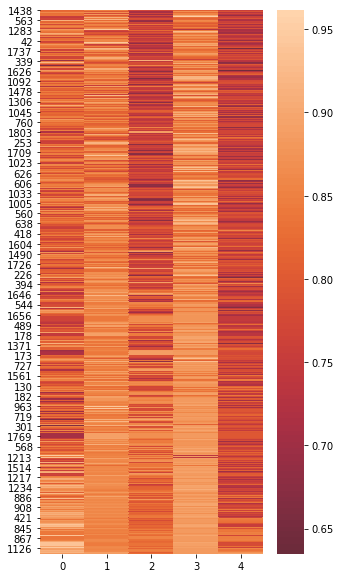

In [29]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.heatmap(roc_all_table[[0,1,2,3,4]], center=0.5, ax=ax,)
fig.savefig('/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/Suppl_1_au_roc_heatmap.svg')

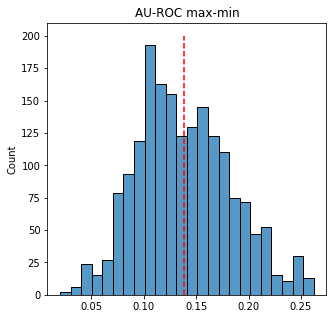

In [30]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(roc_all_table.max(axis=1)-roc_all_table.min(axis=1))
plt.vlines(x=0.13845470277871788, ymin=0, ymax=200, linestyles='dashed', colors='red')
plt.title('AU-ROC max-min')
fig.savefig('/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/Suppl_1_au_roc_max_min.svg', format='svg')

In [31]:
print(np.mean(roc_all_table.max(axis=1)-roc_all_table.min(axis=1)), np.var(roc_all_table.max(axis=1)-roc_all_table.min(axis=1)))

0.13845470277871788 0.0020040852777799874


In [32]:
np.var([1,0])

0.25

In [33]:
main_feature_list = list(feature_method_dict.keys())
len(main_feature_list)

268

In [34]:
main_feature_list

['no_selectVcomFair_logisticFwd',
 'no_selectVcomFair_sis',
 'no_selectVcomFair_cor_logisticFwd',
 'no_selectVcomFair_cor_sis',
 'no_selectVnotComHC_grn3_logisticFwd',
 'no_selectVnotComFair_logisticFwd',
 'no_selectVnotComFair_sis',
 'no_selectVnotComFair_cor_logisticFwd',
 'no_selectVnotComFair_cor_sis',
 'no_zscore_cppls',
 'no_zscore_cor_pcr',
 'no_zscore_cor_plsr',
 'no_zscore_cor_cppls',
 'no_selectVcomExpHC_pcr',
 'no_selectVcomExpHC_plsr',
 'no_selectVcomExpHC_cppls',
 'no_selectVcomExpHC_cor_plsr',
 'no_selectVcomExpHC_cor_cppls',
 'no_selectVcomExpHC_cor_zscore_plsr',
 'no_selectVcomExpHC_cor_zscore_cppls',
 'no_selectVcomHC_pcr',
 'no_selectVcomHC_plsr',
 'no_selectVcomHC_cppls',
 'no_selectVcomHC_cor_plsr',
 'no_selectVcomHC_cor_cppls',
 'no_selectVcomHC_cor_zscore_plsr',
 'no_selectVcomHC_cor_zscore_cppls',
 'no_selectVcomFair_no',
 'no_selectVcomFair_plsr',
 'no_selectVcomFair_cppls',
 'no_selectVcomFair_cor_no',
 'no_selectVcomFair_cor_pcr',
 'no_selectVcomFair_cor_plsr'

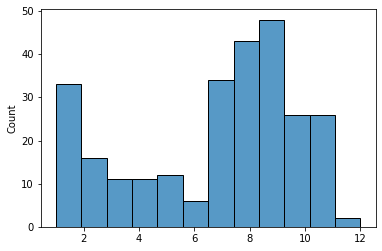

In [35]:
sns.histplot([len(feature_method_dict[i]) for i in feature_method_dict.keys()],bins=12)

In [36]:
temp_dict = {}
missed = []
feature_distribution = []
all_other = []
for i in data:
    the_route = i['method'][0]
    if  the_route.find('cppls') != -1 or the_route.find('plsr') != -1 or the_route.find('pcr') != -1:
        name = "_".join(the_route.split('_')[2:])
        if path.exists('/Volumes/Work/Vahid_work/classification_newcode_data/main_feature/'+the_route+'.txt'):
            gene_vec = [gene.rstrip("\n") for gene in open('/Volumes/Work/Vahid_work/classification_newcode_data/main_feature/'+the_route+'.txt').readlines()]
            if name not in temp_dict.keys():
                temp_dict[name] = [gene_vec]
            else:
                temp_dict[name].append(gene_vec)
            feature_distribution.append(len(gene_vec))
        else:
            print("Not found", the_route)
            missed.append(the_route)
    else:
        name = "_".join(i['method'][0].split('_')[2:])
        if name not in temp_dict.keys():
            temp_dict[name] = [i['features']]
        else:
            temp_dict[name].append(i['features'])
        all_other.append(len(i['features']))

In [37]:
len(feature_distribution)

4698

(array([3.97e+03, 1.58e+02, 2.32e+02, 3.50e+01, 1.91e+02, 2.10e+01,
        1.00e+00, 6.00e+01, 1.60e+01, 1.40e+01]),
 array([3.0000e+00, 7.4710e+02, 1.4912e+03, 2.2353e+03, 2.9794e+03,
        3.7235e+03, 4.4676e+03, 5.2117e+03, 5.9558e+03, 6.6999e+03,
        7.4440e+03]),
 <a list of 10 Patch objects>)

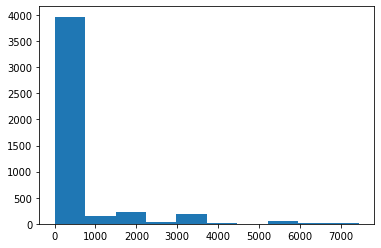

In [38]:
plt.hist(feature_distribution)
# plt.xlim([0,100])

(0.0, 500.0)

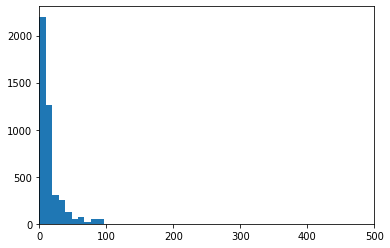

In [39]:
plt.hist([i for i in all_other if i<100])
plt.xlim([0,500])

# for the test

In [40]:
_the_table_test = pd.read_csv('/Volumes/Work/Vahid_work/classification_newcode_data/final_testDataset_HT12_test/roc_mean.csv', index_col=0)

_the_table_test = _the_table_test.drop('sqda', axis=1)
test_feature_method_dict = {} 
route_list_test = []
test_feature_classifier = [[],[]]
test_feature_distribution = []
_count = 0
for i in _the_table_test.index.tolist():
    _name = "_".join(i.split("_")[1:])
    for j in _the_table_test.columns.tolist():
        if _the_table_test.loc[i,j] > 0.75:
            if _name not in test_feature_method_dict.keys():
                test_feature_method_dict[_name] = [j]
            else:
                test_feature_method_dict[_name].append(j)
#             if i in _the_table.index.to_list() and j in _the_table.columns.to_list() and _the_table.loc[i,j] > 0.8:
#                 _count += 1
#             test_feature_distribution.append(len(gene_vec))
        test_feature_classifier[0].append("@".join([_name,j]))
        test_feature_classifier[1].append(_the_table_test.loc[i,j])
route_list_test = list(test_feature_method_dict.keys())
print(_count)
with open('/Volumes/Work/Vahid_work/classification_newcode_data/final_testDataset_HT12_test/feature.json') as f:
    data_test = json.load(f)
            
test_temp_dict = {}
missed = []
for i in data_test:
    the_route = i['method'][0]
    if  the_route.find('cppls') != -1 or the_route.find('plsr') != -1 or the_route.find('pcr') != -1:
        name = "_".join(the_route.split('_')[1:])
        if path.exists('/Volumes/Work/Vahid_work/classification_newcode_data/final_testDataset_HT12_test/test_feature/'+the_route+'.txt'):
            gene_vec = [gene.rstrip("\n") for gene in open('/Volumes/Work/Vahid_work/classification_newcode_data/final_testDataset_HT12_test/test_feature/'+the_route+'.txt').readlines()]
#             [int(i) for i in gene_vec]
            if name not in test_temp_dict.keys():
                test_temp_dict[name] = [gene_vec]
            else:
                test_temp_dict[name].append(gene_vec)
        else:
            print("Not found", the_route)
            missed.append(the_route)
    else:
        name = "_".join(i['method'][0].split('_')[1:])

        if name not in test_temp_dict.keys():
            test_temp_dict[name] = [i['features']]
        else:
            test_temp_dict[name].append(i['features'])
        
the_overlap = sorted(list(set(main_feature_list).intersection(set(route_list_test))))
_yst=test_temp_dict['cov_selectVcomExpHC_cor_cppls']

0
Not found independent_cov_grn1_cppls
Not found independent_cov_grn1Cntl_cppls


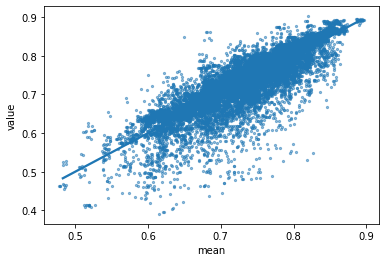

In [41]:
_updated_the_table_test = _the_table_test[(_the_table_test > 0.1).all(1)]
_repeat_list_test = list(itertools.chain.from_iterable(itertools.repeat(x, 12) for x in _updated_the_table_test.transpose().mean()))
_the_table_melt_test = _updated_the_table_test.transpose().melt()
_the_table_melt_test['mean'] = _repeat_list_test
_the_table_melt_test

ax = sns.scatterplot()
ax = sns.regplot(x="mean", y="value", data=_the_table_melt_test, ci=95, scatter_kws={'s':5,'alpha':0.5}, x_jitter=0.005)
x = _the_table_melt_test["mean"]
y = _the_table_melt_test["value"]



0.030360531309297945 0.29506641366223907
(0.10919411195297458, 0.1162099549586219)


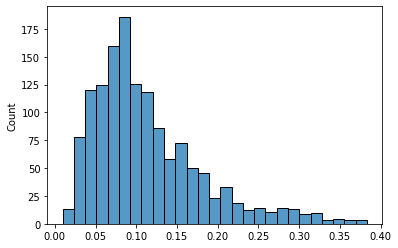

In [42]:
divence = sorted(_updated_the_table_test.max(axis=1)-_updated_the_table_test.min(axis=1))
print(divence[int(0.025*len(divence))], divence[int(0.975*len(divence))])
import numpy as np, scipy.stats as st

print(st.t.interval(0.95, len(divence)-1, loc=np.mean(divence), scale=st.sem(divence)))
sns.histplot(_updated_the_table_test.max(axis=1)-_updated_the_table_test.min(axis=1))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


[0.07965368 0.07965249 0.07965132 0.07965017 0.07964903 0.07964792
 0.07964682 0.07964575 0.07964469 0.07964366 0.07964264 0.07964164
 0.07964066 0.07963971 0.07963877 0.07963785 0.07963695 0.07963607
 0.07963521 0.07963437 0.07963355 0.07963275 0.07963196 0.0796312
 0.07963046 0.07962973 0.07962903 0.07962835 0.07962768 0.07962703
 0.07962641 0.0796258  0.07962522 0.07962465 0.0796241  0.07962357
 0.07962306 0.07962257 0.0796221  0.07962165 0.07962122 0.07962081
 0.07962042 0.07962005 0.0796197  0.07961936 0.07961905 0.07961876
 0.07961848 0.07961823 0.07961799 0.07961778 0.07961758 0.07961741
 0.07961725 0.07961711 0.07961699 0.0796169  0.07961682 0.07961676
 0.07961672 0.0796167  0.0796167  0.07961672 0.07961676 0.07961681
 0.07961689 0.07961699 0.07961711 0.07961724 0.0796174  0.07961757
 0.07961777 0.07961798 0.07961822 0.07961847 0.07961874 0.07961904
 0.07961935 0.07961968 0.07962003 0.0796204  0.07962079 0.0796212
 0.07962163 0.07962208 0.07962255 0.07962304 0.07962355 0.079624

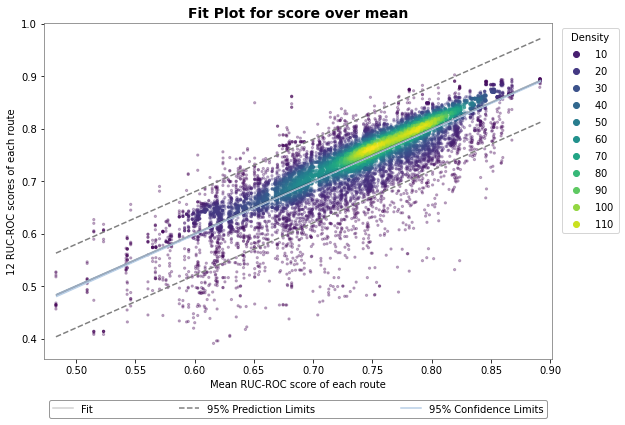

In [43]:
customized_ci_plotting(_the_table_melt_test["mean"], _the_table_melt_test["value"], address="/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/suppl_test_mean_vs_all_score.pdf", fmt='pdf')


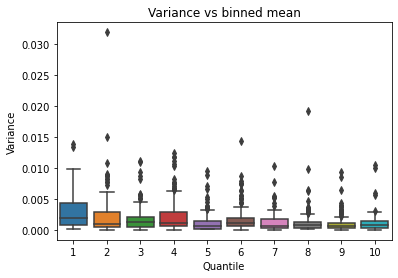

In [44]:
_temp_data= pd.DataFrame(data={'y':_updated_the_table_test.transpose().var(),'x':_updated_the_table_test.transpose().mean()})
_temp_data['mean_bin'] = pd.qcut(_temp_data['x'], q=10, labels=range(1,11))
fig, ax = plt.subplots(figsize=(6, 4))
# sns.scatterplot(data=_temp_data, x="mean_bin", y="y", s=8)
ax = sns.boxplot(x="mean_bin", y="y", data=_temp_data)
plt.xlabel("Quantile")
plt.ylabel("Variance")
plt.title("Variance vs binned mean")
plt.savefig("/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/suppl_test_mean_vs_score_var.pdf", format='pdf')


In [45]:
cutted_the_table_index = []
for i in _the_table.index.to_list():
    cutted_the_table_index.append("_".join(i.split('_')[1:]))
cutted_the_table_index

['no_no_sis',
 'no_grn4_sis',
 'no_grn4Cntl_sis',
 'no_grn5_sis',
 'no_grn5Cntl_sis',
 'no_grn1_sis',
 'no_grn1Cntl_sis',
 'no_grn2_sis',
 'no_grn2Cntl_sis',
 'no_grn3_logisticFwd',
 'no_grn3Cntl_logisticFwd',
 'no_grn3Cntl_sis',
 'no_zscore_sis',
 'no_zscore_cor_sis',
 'no_zscore_grn3_logisticFwd',
 'no_zscore_grn3Cntl_logisticFwd',
 'no_zscore_grn3Cntl_sis',
 'no_selectVcomExpHC_sis',
 'no_selectVcomExpHC_grn3_zscore_logisticFwd',
 'no_selectVcomExpHC_grn3_zscore_sis',
 'no_selectVcomExpHC_grn3_cor_logisticFwd',
 'no_selectVcomExpHC_grn3_cor_sis',
 'no_selectVcomExpHC_grn3_logisticFwd',
 'no_selectVcomExpHC_grn3_sis',
 'no_selectVcomExpHC_grn3Cntl_zscore_logisticFwd',
 'no_selectVcomExpHC_grn3Cntl_zscore_sis',
 'no_selectVcomExpHC_grn3Cntl_cor_logisticFwd',
 'no_selectVcomExpHC_grn3Cntl_cor_sis',
 'no_selectVcomExpHC_grn3Cntl_logisticFwd',
 'no_selectVcomExpHC_grn3Cntl_sis',
 'no_selectVcomExpHC_cor_sis',
 'no_selectVcomExpHC_cor_zscore_logisticFwd',
 'no_selectVcomExpHC_cor_zscore_s

In [46]:
sum([len(test_feature_method_dict[i]) for i in test_feature_method_dict if i in cutted_the_table_index])

7717

In [47]:
test_feature_table = pd.DataFrame(data={"test_feature": test_feature_classifier[0], 'test_roc':test_feature_classifier[1]})
print(test_feature_table.shape)
main_feature_table = pd.DataFrame(data={"main_feature": main_feature_classifier[0], 'main_roc':main_feature_classifier[1]})
print(main_feature_table.shape)
main_feature_table = main_feature_table[main_feature_table.main_feature.isin(test_feature_table.test_feature)]
main_feature_table = main_feature_table.sort_values(by="main_feature").reset_index(drop=True)
print(main_feature_table.shape)
test_feature_table = test_feature_table[test_feature_table.test_feature.isin(main_feature_table.main_feature)]
test_feature_table = test_feature_table.sort_values(by="test_feature").reset_index(drop=True)
print(test_feature_table.shape)
merged_table = pd.concat([test_feature_table, main_feature_table], axis=1).dropna()
merged_table = merged_table[~(merged_table == 0).any(axis=1)]

(19224, 2)
(15840, 2)
(15732, 2)
(15732, 2)


In [48]:
test_feature_table[test_feature_table.test_roc>0.75]

,test_feature,test_roc
2,cov_grn1Cntl_cppls@elasticNetLogReg,0.812144
3,cov_grn1Cntl_cppls@lassoLogReg,0.807400
4,cov_grn1Cntl_cppls@lassoReg,0.796964
5,cov_grn1Cntl_cppls@lda,0.796964
6,cov_grn1Cntl_cppls@logReg,0.814042
...,...,...
15723,var_zscore_wgcna@lassoLogReg,0.790323
15724,var_zscore_wgcna@lassoReg,0.771347
15725,var_zscore_wgcna@lda,0.787476
15726,var_zscore_wgcna@logReg,0.798861


In [49]:
akk=main_feature_table[main_feature_table.main_roc>0.8].main_feature.to_list()
_count=0
for i in akk:
    if i.find('wgcna')!=-1:
        _count+=1
print(_count)
main_feature_table[main_feature_table.main_roc>0.8]

3


,main_feature,main_roc
614,cov_selectVcomExpHC_cor_cppls@elasticNetLogReg,0.811870
615,cov_selectVcomExpHC_cor_cppls@lassoLogReg,0.809518
616,cov_selectVcomExpHC_cor_cppls@lassoReg,0.807812
617,cov_selectVcomExpHC_cor_cppls@lda,0.807472
618,cov_selectVcomExpHC_cor_cppls@logReg,0.816562
...,...,...
15666,var_zscore_grn3_plsr@logReg,0.807433
15668,var_zscore_grn3_plsr@randomForest,0.810693
15669,var_zscore_grn3_plsr@reg,0.804307
15670,var_zscore_grn3_plsr@ridgeLogReg,0.809457


In [50]:
main_feature_table.main_feature.value_counts()

var_selectVcomExpHC_grn3Cntl_cor_no@boosting         1
no_selectVnotComFair_cor_no@boosting                 1
no_zscore_pcr@lassoLogReg                            1
var_zscore_grn3Cntl_logisticFwd@lassoReg             1
no_selectVnotComExpHC_cor_zscore_plsr@ridgeLogReg    1
                                                    ..
var_selectVnotComExpHC_grn3_zscore_cppls@bagging     1
no_selectVcomExpHC_grn3_cor_plsr@lassoReg            1
no_selectVnotComExpHC_pcr@ridgeReg                   1
var_selectVcomExpHC_grn3_logisticFwd@logReg          1
cov_selectVcomHC_cor_zscore_sis@lassoReg             1
Name: main_feature, Length: 15732, dtype: int64

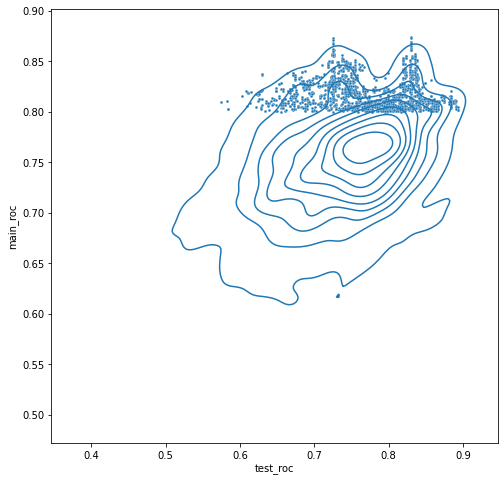

<Figure size 432x288 with 0 Axes>

In [51]:
import seaborn as sns
plt.subplots(figsize=(8, 8))
sns.scatterplot(data=merged_table[merged_table.main_roc>0.8], x="test_roc", y="main_roc", s=8)
sns.kdeplot(data=merged_table[["test_roc", "main_roc"]],  x="test_roc", y="main_roc")
plt.show()
plt.savefig('/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/Suppx_1_au_roc_mainvstest.svg',format='svg')

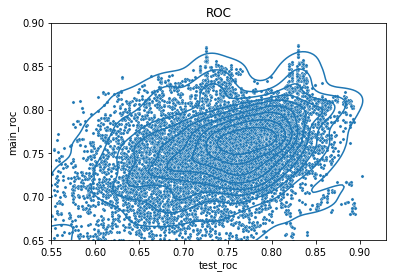

In [52]:
# plt.subplot(fig)
sns.scatterplot(data=merged_table, x="test_roc", y="main_roc", s=10)
sns.kdeplot(data=merged_table[["test_roc", "main_roc"]], x="test_roc", y="main_roc")
plt.title("ROC")
plt.xlim([0.55,0.93])
plt.ylim([0.65,0.9])
plt.show()

In [53]:
merged_table_high = merged_table[(merged_table.main_roc>0.8) & (merged_table.test_roc>0.75)]
merged_table_high = merged_table_high.reset_index(drop=True)
merged_table_high

,test_feature,test_roc,main_feature,main_roc
0,cov_selectVcomExpHC_cor_cppls@elasticNetLogReg,0.785579,cov_selectVcomExpHC_cor_cppls@elasticNetLogReg,0.811870
1,cov_selectVcomExpHC_cor_cppls@lassoLogReg,0.781784,cov_selectVcomExpHC_cor_cppls@lassoLogReg,0.809518
2,cov_selectVcomExpHC_cor_cppls@lassoReg,0.781784,cov_selectVcomExpHC_cor_cppls@lassoReg,0.807812
3,cov_selectVcomExpHC_cor_cppls@lda,0.781784,cov_selectVcomExpHC_cor_cppls@lda,0.807472
4,cov_selectVcomExpHC_cor_cppls@logReg,0.798861,cov_selectVcomExpHC_cor_cppls@logReg,0.816562
...,...,...,...,...
1070,var_selectVnotComHC_plsr@lassoReg,0.774194,var_selectVnotComHC_plsr@lassoReg,0.802811
1071,var_selectVnotComHC_plsr@lda,0.774194,var_selectVnotComHC_plsr@lda,0.802460
1072,var_selectVnotComHC_plsr@reg,0.774194,var_selectVnotComHC_plsr@reg,0.802811
1073,var_selectVnotComHC_plsr@ridgeLogReg,0.774194,var_selectVnotComHC_plsr@ridgeLogReg,0.808513


In [54]:
overlapped_route = merged_table_high.main_feature.tolist()

In [55]:
merged_table_high.loc[0, 'test_roc']

0.7855787476280841

In [56]:
overlapped_route_dict = {}
model_count = {}
model_score = {}
for idex,i in enumerate(overlapped_route):
    _route, _method = i.split('@')
    if _route not in overlapped_route_dict.keys():
        overlapped_route_dict[_route] = [_method]
        model_count[_route] = 1
        model_score[_route] = merged_table_high.loc[idex, 'main_roc']
    else:
        overlapped_route_dict[_route].append(_method)
        model_count[_route] += 1
        model_score[_route] += merged_table_high.loc[idex, 'main_roc']
        
overlapped_route_dict
counts_list = []
for i in model_count:
    counts_list.append(model_count[i])
score_count=[]
for i in model_score:
    score_count.append(model_score[i])

Text(0.5, 0, '# of model from one route that have AUC>0.8 in training and AUC>0.75 in test')

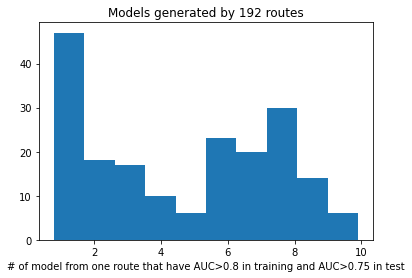

In [57]:
import seaborn as sns

plt.hist(score_count)
plt.title("Models generated by 192 routes")
plt.xlabel('# of model from one route that have AUC>0.8 in training and AUC>0.75 in test')
# plt.xlim([0,13])

(0.0, 13.0)

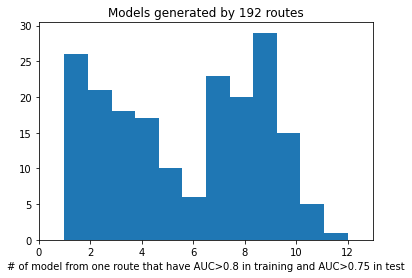

In [58]:
import seaborn as sns
plt.hist(counts_list, bins=12)
plt.title("Models generated by 192 routes")
plt.xlabel('# of model from one route that have AUC>0.8 in training and AUC>0.75 in test')
plt.xlim([0,13])
# plt.savefig('/Wo')

In [59]:
#
class gene_share:
    def __init__(self, method, list_test, list_training):
        """list_test is a 2-d lst;
        list_trainning is also a 2-d list
        """
        self.method=method
        self.test_gene = list_test[0]
        self.overlap_count_dict = {}
        for i in self.test_gene:
            self.overlap_count_dict[i] = 0
        self.training_gene_count = {}
        self.training_gene = list(chain.from_iterable(list_training))
        for i in self.training_gene:
            self.training_gene_count[i] = 0
        self.exist_iter = len(list_training)
        self.total_number = len(set(self.test_gene))
        
        self.gene_weight = 0
        self.count_exist()
        
    def count_exist(self):
        for i in self.training_gene:
            if i in self.test_gene:
                self.overlap_count_dict[i] += 1/self.exist_iter
            self.training_gene_count[i] += 1/self.exist_iter
#         return self.count_dict
        _temp_weight = 0
#         print(self.count_dict)
        for i in self.overlap_count_dict.keys():
#             print(self.count_dict[i])
            _temp_weight += self.overlap_count_dict[i]/self.total_number
        self.gene_weight = _temp_weight
        
    def overlapped_high(self):
        "overlap/overlap high"
        return len(self.get_overlapped_high_test_gene())/len(self.get_overlapped_test_gene())
        
    def overlapped_all(self):
        return len(list(self.overlap_count_dict.keys()))/len(list(self.training_gene_count.keys()))
    
    def get_count_dict(self):
        return self.overlap_count_dict
    
    def get_high_training_gene(self):
        """return gene that have 0.5 more in 5-fold cross validation"""
        return_lst = [i for i in self.training_gene_count.keys() if self.training_gene_count[i]>0.5]
        return return_lst
    
    def get_overlapped_all_test_gene(self):
        """return gene that have all in the overlapped"""
        return_lst = [i for i in self.overlap_count_dict.keys() if self.overlap_count_dict[i]>0.9]
        return return_lst
    
    def get_overlapped_high_test_gene(self):
        """return gene that have 4/5 more in the overlapped"""

        return_lst = [i for i in self.overlap_count_dict.keys() if self.overlap_count_dict[i]>0.7]
        return return_lst
    
    def get_overlapped_mid_test_gene(self):
        """return gene that have 3/5 more in the overlapped"""
        return_lst = [i for i in self.overlap_count_dict.keys() if self.overlap_count_dict[i]>0.5]
        return return_lst
    
    def get_overlapped_test_gene(self):
        return_lst = [i for i in self.overlap_count_dict.keys() if self.overlap_count_dict[i]>0]
        return return_lst
    def get_all_training_gene(self):
#         print(list(set(self.training_gene)))
        return list(set(self.training_gene))
    
    def get_all_test_gene(self):
        return list(set(self.test_gene))
    
    def get_gene_weight(self):
        return self.gene_weight
    
    



In [60]:
%matplotlib inline

In [61]:
from itertools import chain
feature_list = []
classifier_used = []
overlapped_all_dict = {}
overlapped_high_dict = {}
overlapped_mid_dict = {}
overlapped_dict = {}
test_all_dict = {}
overlapped_route_dict_list = list(overlapped_route_dict.keys())
training_all_dict = {}
# print(count)
count = 0

feature_length = []
for i in overlapped_route_dict_list:
    if i not in test_temp_dict.keys() or i not in temp_dict.keys():
        print(i)
        continue
#     if i.find('plsr') != -1 or i.find('pcr') != -1:
#         count += 1
#     elif i.find('cppls') != -1 :
#         continue
# #     print(i)
#     print(test_temp_dict[i])
    
    _temp = gene_share(i, test_temp_dict[i], temp_dict[i])
    feature_length.append( _temp.total_number)
#     print(_temp.)
#     if _temp.total_number<5:
#         print(test_temp_dict[i])
#         print( temp_dict[i])
    feature_list.append(_temp.get_gene_weight())
#     print(_temp.get_gene_weight())
#     print(feature_index_dict_method[i])
#     print(_temp.get_count_dict())
#     print("Overlap high",_temp.overlapped_high())
#     print("Overlap all",  _temp.overlapped_all())
#     print("get_all_training_gene", len(_temp.get_all_training_gene()))
#     print("get_high_training_gene", len(_temp.get_high_training_gene()))
#     print("get_overlapped_test_gene", len(_temp.get_overlapped_test_gene()))
#     print("overlapped_high", _temp.overlapped_high())
#     print("get_all_test_gene", len(_temp.get_all_test_gene()))
#     print("overlap_over_test_ratio", _temp.get_overlap_test_ratio())
#     print("get_all_test_gene",len(_temp.get_all_test_gene()))
    overlapped_all_dict[i] = _temp.get_overlapped_all_test_gene()
    overlapped_high_dict[i] = _temp.get_overlapped_high_test_gene()
    overlapped_mid_dict[i] = _temp.get_overlapped_mid_test_gene()
    overlapped_dict[i] = _temp.get_overlapped_test_gene()
    test_all_dict[i] = _temp.get_all_test_gene()
    training_all_dict[i] = _temp.get_all_training_gene()

## testing the feature similarity

## checking the gene in test_all_name_list

In [62]:
len(test_all_dict.keys())

191

In [63]:
gene_existence_table= pd.read_csv("/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/500_top_gene_existence_table.csv",index_col=0)
first_500_gene = gene_existence_table.columns.to_list()
the_similarity_table = np.zeros((len(test_all_dict), len(test_all_dict)))
test_all_name_list = sorted(list(test_all_dict.keys()))
gene_existence_array = np.zeros((len(test_all_name_list), 500))
for idex,i in enumerate(test_all_name_list):
#     for gdex, gene in enumerate(first_500_gene):
#         if gene in training_all_dict[i]:
#             gene_existence_array[idex, gdex]=1
            
    for jdex,j in enumerate(test_all_name_list):
        the_length = len(np.intersect1d(test_all_dict[i], test_all_dict[j]))
        the_overlap = (the_length+1)/(len(test_all_dict[i])+1) * ((the_length+1)/(len(test_all_dict[j])+1))
        if the_overlap>1:
            print(the_length, len(test_all_dict[i]), len(test_all_dict[j]))
        if np.isnan(the_overlap):
            print('a')
        the_similarity_table[idex, jdex] = the_overlap
the_similarity_table = pd.DataFrame(the_similarity_table, columns=test_all_name_list, index=test_all_name_list)
keep = np.triu(np.ones(the_similarity_table.shape)).astype('bool').reshape(the_similarity_table.size)
_simi = the_similarity_table.stack()[keep]

# gene_existence_table = pd.DataFrame(data=gene_existence_array, index=test_all_name_list, columns=first_500_gene)

simi_euc_var = gene_existence_table.index.to_list()
from scipy.spatial.distance import euclidean, pdist, squareform, cosine, cityblock

simidists = pdist(gene_existence_table, euclidean)
simi_euclid = pd.DataFrame(squareform(simidists), columns=simi_euc_var, index=simi_euc_var)

# 191 routes

In [64]:
f1 = ['no', 'cov_var', 'cov', 'varImportance', 'var']
f2 = ['no', 'grn', 'selectV', 'zscore', 'svm', 'GSEA','DE']
f3 = ['no', 'plsr', 'pcr', 'cppls', 'wgcna', 'logisticFwd','sis']
main_route_list = test_all_name_list
# ['no', 'cov', 'var', 'cor_var', 'varImportance']
# ['no', 'cov', 'var', 'cor_var', 'varImportance']
feature_1 = [0]*5
feature_2 = [0]*7
feature_3 = [0]*7
for i in main_route_list:
    _found = False
    for p1dex,p1 in enumerate(f1): 
#         print(p1)
        if i.startswith(p1):
            feature_1[p1dex] += 1
            temp = i[len(p1)+1:]
            _found = True
            break
    assert _found,'round1'
    _found = False
    for p2dex,p2 in enumerate(f2): 
        if temp.startswith(p2):
            feature_2[p2dex] += 1
            _found = True
            break
    assert _found,'round2 '+i+" "+temp
    _found = False
    for p3dex,p3 in enumerate(f3): 
        if i.endswith(p3):
            feature_3[p3dex] += 1
            _found = True
            break
    assert _found,'round3'

pd.DataFrame(data=[feature_1, feature_2,feature_3]).transpose()
pd.DataFrame(data=[f1, f2,f3]).transpose()

,0,1,2
0,no,no,no
1,cov_var,grn,plsr
2,cov,selectV,pcr
3,varImportance,zscore,cppls
4,var,svm,wgcna
5,None,GSEA,logisticFwd
6,None,DE,sis


# Similarity table

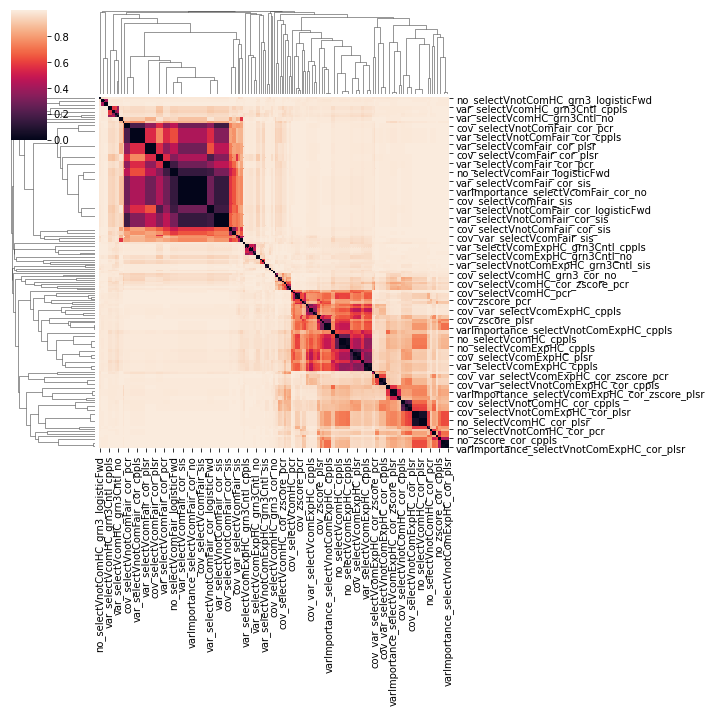

In [65]:
# simidists = pdist(gene_existence_table, euclidean)
# simi_euclid = pd.DataFrame(squareform(simidists), columns=simi_euc_var, index=simi_euc_var)
# gene_existence_array = _gene_existence_table.transpose().corr(method='pearson')
# keep_corr = np.triu(np.ones(gene_existence_array.shape)).astype('bool').reshape(gene_existence_array.size)
# simi_cor = gene_existence_array.stack()[keep_corr]
import pandas as pd, seaborn as sns
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
# from sklearn.datasets import load_iris
DF_dism = 1 - the_similarity_table   # distance matrix
DF_dism.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/route_similarity_191.csv')
linkage = hc.linkage(sp.distance.squareform(DF_dism), method='average')
sns.clustermap(DF_dism, row_linkage=linkage, col_linkage=linkage)

plt.savefig('/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/Suppl_3_routes_500.pdf', format='pdf')

## checking the gene in all test_routes

In [66]:
_the_similarity_table = np.zeros((len(test_all_name_list), len(test_all_dict)))
# _test_all_name_list = sorted(list(test_temp_dict.keys()))
_gene_existence_array = np.zeros((len(test_all_name_list), 500))
for idex,i in enumerate(test_all_name_list):
    for gdex, gene in enumerate(first_500_gene):
        if gene in test_temp_dict[i][0]:
            _gene_existence_array[idex, gdex] = 1
        
# the_similarity_table = pd.DataFrame(the_similarity_table, columns=test_all_name_list, index=test_all_name_list)
# keep = np.triu(np.ones(the_similarity_table.shape)).astype('bool').reshape(the_similarity_table.size)
# _simi = the_similarity_table.stack()[keep]

_gene_existence_table = pd.DataFrame(data=_gene_existence_array, index=test_all_name_list, columns=first_500_gene)
_gene_existence_table

,9638,220042,10643,115004,3613,6256,163732,23492,359845,57118,...,79594,9766,85395,23325,28996,85464,64425,728,80896,50808
cov_selectVcomExpHC_cor_cppls,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cov_selectVcomExpHC_cor_plsr,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cov_selectVcomExpHC_cor_zscore_pcr,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cov_selectVcomExpHC_cppls,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
cov_selectVcomExpHC_grn3Cntl_cppls,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_selectVnotComFair_plsr,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
var_selectVnotComFair_sis,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
var_selectVnotComHC_cppls,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
var_selectVnotComHC_grn3_cppls,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


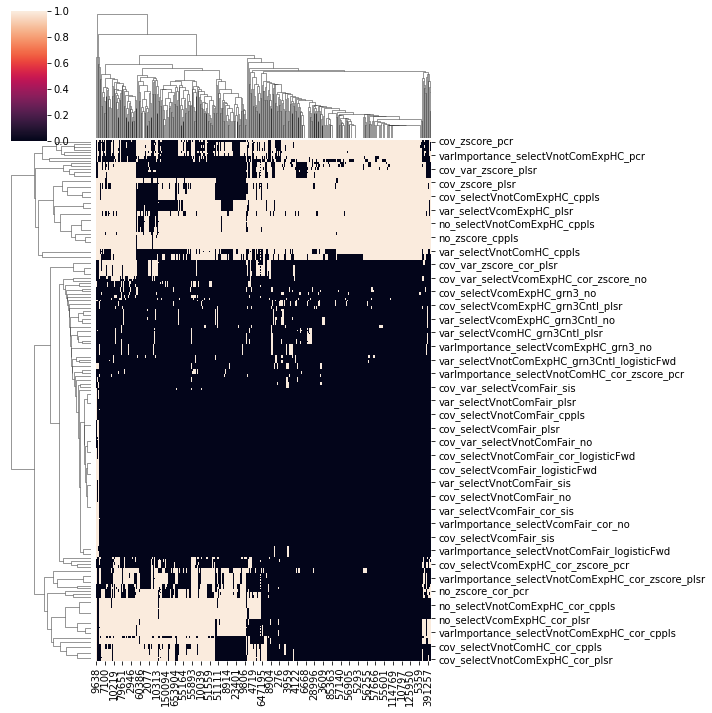

In [67]:
sns.clustermap(_gene_existence_table)
plt.savefig('/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/Suppl_3_routes_500.pdf', format='pdf')

In [68]:
import copy 
_reindex_the_table_test = copy.deepcopy(_the_table_test)
_reindex_the_table_test.index = ['_'.join(i.split('_')[1:]) for i in _reindex_the_table_test.index.to_list()]
_reindex_the_table_test = _reindex_the_table_test[_reindex_the_table_test.index.isin(test_all_dict.keys())]
_reindex_the_table_test = _reindex_the_table_test.transpose()
_reindex_the_table_test = _reindex_the_table_test[sorted(_reindex_the_table_test.columns.to_list())]

In [69]:
DF_var = _reindex_the_table_test.columns.to_list()
from scipy.spatial.distance import euclidean, pdist, squareform, cosine, cityblock

dists = pdist(_reindex_the_table_test.transpose(), cityblock)
DF_city = pd.DataFrame(squareform(dists), columns=DF_var, index=DF_var)

In [70]:
_reindex_the_table_test_cor = _reindex_the_table_test.corr(method='spearman')
keep_corr = np.triu(np.ones(_reindex_the_table_test_cor.shape)).astype('bool').reshape(_reindex_the_table_test_cor.size)
_cor = _reindex_the_table_test_cor.stack()[keep_corr]

DF_var = _reindex_the_table_test.columns.to_list()
cosine_dists = pdist(_reindex_the_table_test.transpose(), cosine)
cosine_dists_table = pd.DataFrame(squareform(cosine_dists), columns=DF_var, index=DF_var)
keep_cosine = np.triu(np.ones(cosine_dists_table.shape)).astype('bool').reshape(cosine_dists_table.size)
_cos = cosine_dists_table.stack()[keep_cosine]


# similarity
from scipy.spatial.distance import euclidean, pdist, squareform, cosine, cityblock

dists = pdist(_reindex_the_table_test.transpose(), euclidean)
DF_euclid = pd.DataFrame(squareform(dists), columns=DF_var, index=DF_var)
keep_euc = np.triu(np.ones(DF_euclid.shape)).astype('bool').reshape(DF_euclid.size)
_euc = DF_euclid.stack()[keep_euc]

simi_euc = np.triu(np.ones(simi_euclid.shape)).astype('bool').reshape(simi_euclid.size)

simi_euc = simi_euclid.stack()[simi_euc]

model_simi=pd.DataFrame({'simi':_simi, 'cor':_cor, 'simi_log':-np.log2(_simi),
                         'euc':_euc, 'simi_euc':simi_euc,  'cos':_cos})

model_simi['cbin_simi_log'] = pd.cut(model_simi['simi_log'], bins=[-0.01, 1,2,3,4,5,6,7,8,9, 10, 11, 12, 13], labels=range(0, 13))

# model_simi

In [71]:
sum(feature_1_main)

2301

# Suppl_6_routes_similarity_cor

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # Remove the CWD from sys.path while we load stuff.


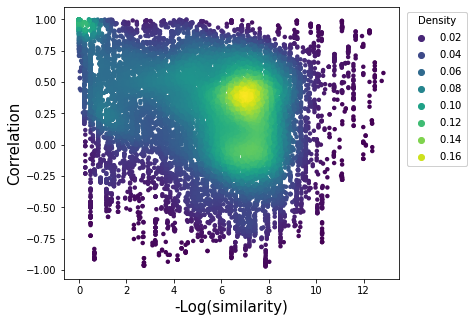

<Figure size 432x288 with 0 Axes>

In [72]:
# Generate fake data
x = model_simi["simi_log"]
y = model_simi["cor"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots(figsize=(6, 5))
scatter = ax.scatter(x, y, c=z, s=20, edgecolor='')
#     plt.show()
handles, labels = scatter.legend_elements(prop="colors", alpha=1)
legend2 = ax.legend(handles, labels, bbox_to_anchor = (1.01, 1), title="Density")
ax.add_artist(legend2)
plt.xlabel('-Log(similarity)', fontsize=15)
plt.ylabel('Correlation', fontsize=15)
plt.show()
plt.savefig('/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/Suppl_6_routes_similarity_cor.pdf', format='pdf')


# Suppl_6_routes_similarity_eucli

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # Remove the CWD from sys.path while we load stuff.


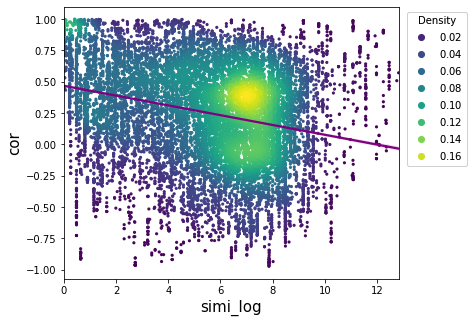

In [73]:
# Generate fake data
x = model_simi["simi_log"]
y = model_simi["cor"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots(figsize=(6, 5))
scatter = ax.scatter(x, y, c=z, s=10, edgecolor='')
#     plt.show()
handles, labels = scatter.legend_elements(prop="colors", alpha=1)
legend2 = ax.legend(handles, labels, bbox_to_anchor = (1.01, 1), title="Density")
ax.add_artist(legend2)
plt.xlabel('-Log(similarity)', fontsize=15)
plt.ylabel('Correlation', fontsize=15)
# plt.plot(np.unique(Y_test), np.poly1d(np.polyfit(Y_test, Y_pred, 1))(np.unique(Y_test)))
# ax.plot(x.values.reshape(-1,1), response, color='k', label='Regression model')
sns.regplot(x="simi_log", y="cor", data=model_simi,fit_reg=True, x_estimator=np.mean, ci=95, ax=ax, scatter=False, color= 'purple')

# plt.show()
plt.savefig('/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/Suppl_6_routes_similarity_cor.svg', format='svg')

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats
# x= model_simi['cbin_simi_log'].values.reshape(-1,1)
# ols = linear_model.LinearRegression()
# model = ols.fit(x, y)
# response = model.predict(x)
# r2 = model.score(x, y)
# fig, ax = plt.subplots(figsize=(8, 4))
# ax.plot(x, response, color='k', label='Regression model')
the_result = stats.linregress(model_simi['cbin_simi_log'].values, model_simi['cor'].values)
the_result

LinregressResult(slope=-0.03806252570865483, intercept=0.4443827187728834, rvalue=-0.25294548575900266, pvalue=1.35416223411553e-265, stderr=0.001075187710703305)

In [75]:
model_simi['cbin_simi_log']

cov_selectVcomExpHC_cor_cppls   cov_selectVcomExpHC_cor_cppls         0
                                cov_selectVcomExpHC_cor_plsr          0
                                cov_selectVcomExpHC_cor_zscore_pcr    2
                                cov_selectVcomExpHC_cppls             2
                                cov_selectVcomExpHC_grn3Cntl_cppls    6
                                                                     ..
var_selectVnotComHC_cppls       var_selectVnotComHC_grn3_cppls        4
                                var_selectVnotComHC_plsr              0
var_selectVnotComHC_grn3_cppls  var_selectVnotComHC_grn3_cppls        0
                                var_selectVnotComHC_plsr              4
var_selectVnotComHC_plsr        var_selectVnotComHC_plsr              0
Name: cbin_simi_log, Length: 18336, dtype: category
Categories (13, int64): [0 < 1 < 2 < 3 ... 9 < 10 < 11 < 12]

/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


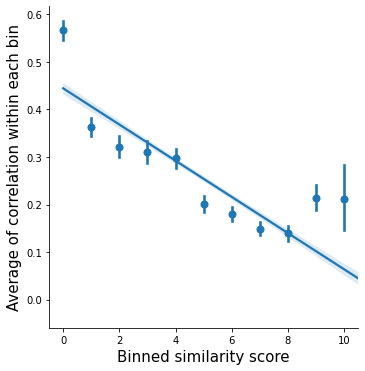

In [76]:
# pd.qcut(model_simi['simi_euc'], q=4)
# model_simi['bin_simi_euc'] = pd.qcut(model_simi['simi_euc'], q=25, labels=range(1,26))
# model_simi['bin_simi_euc_2'] = pd.qcut(model_simi['simi_euc'], q=10, labels=range(1,11))
# model_simi['bin_simi'] = pd.qcut(model_simi['euc'], q=10, labels=range(1,11))
# model_simi['bin_simi_log'] = pd.qcut(model_simi['simi_log'], q=10, labels=range(1,11))


# sns.lmplot(x="bin_simi_euc", y="cor", data=model_simi, x_estimator=np.mean, size=5)
# plt.xlabel('Quantile', fontsize=15)
# plt.ylabel('Average of correlation within each bin', fontsize=15)
# plt.savefig('/Volumes/Work/Vahid_work/classification_newcode_data/final_result_plot/Suppl_6_routes_binned_similarity_cor.pdf', format='pdf')
# plt.show()

sns.lmplot(x="cbin_simi_log", y="cor", data=model_simi, x_estimator=np.mean, size=5)
plt.xlabel('Binned similarity score', fontsize=15)
plt.ylabel('Average of correlation within each bin', fontsize=15)
plt.xlim((-0.5, 10.5))
plt.savefig('/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/Suppl_6_routes_binned_similarity_cor.svg', format='svg')
plt.show()

(array([15., 13.,  0.,  2., 32., 54., 29., 25.,  7., 14.]),
 array([0.05      , 0.13833333, 0.22666667, 0.315     , 0.40333333,
        0.49166667, 0.58      , 0.66833333, 0.75666667, 0.845     ,
        0.93333333]),
 <a list of 10 Patch objects>)

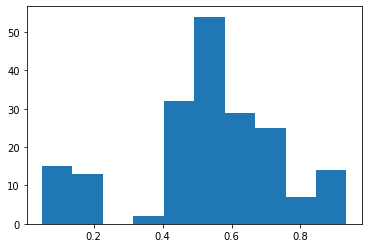

In [77]:
import matplotlib.pyplot as plt
plt.hist(feature_list)

In [78]:
def get_score(_dict, get_score=None, use_score=False):
    _score_dict = {}
#     _dict = overlapped_all_dict
    for i in _dict.keys():
        for _gene in _dict[i]:
            if use_score:
                if _gene not in _score_dict.keys():
                    _score_dict[_gene] = get_score[i]
                else:
                    _score_dict[_gene] += get_score[i]
            else:
                if _gene not in _score_dict.keys():
                    _score_dict[_gene] = 1
                else:
                    _score_dict[_gene] += 1
    _list_key = list(_score_dict.keys())
    _temp_table = pd.DataFrame(data={'gene':_list_key, 'counts':[_score_dict[i] for i in _list_key]}, )
    _temp_table = _temp_table.sort_values('counts', ascending=False)
    _temp_table = _temp_table.reset_index(drop=True)
    _temp_table.columns = ['geneName','score']
#     print(_temp_table.head())
    return _temp_table


In [79]:
overlapped_score_table = get_score(overlapped_dict, model_score)
overlapped_all_score_table = get_score(overlapped_all_dict, model_score)
test_score_table = get_score(test_all_dict, model_score)
training_score_table = get_score(training_all_dict, )


In [80]:
de_gene=pd.read_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/de_main_goodClassification_without_rank_001_logfc01.txt')

In [81]:
test_score_table[test_score_table.geneName.isin(de_gene.x.astype(str))].to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/de_in_features.txt', sep='\t')

In [82]:
de_gene.shape

(1161, 1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


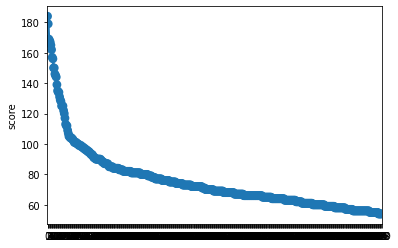

In [83]:
sns.pointplot(x=training_score_table.head(500).index, y=training_score_table.head(500).score)
training_score_table.head(500).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/trainning_gene_500.txt', sep=' ',index=False)
training_score_table.head(500).to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/trainning_gene_score_500.txt', sep=' ', index=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


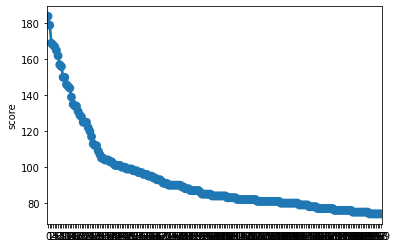

In [84]:
sns.pointplot(x=training_score_table.head(200).index, y=training_score_table.head(200).score)
training_score_table.head(200).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/trainning_gene_200.txt', index=False)
training_score_table.head(200).to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/trainning_gene_score_200.txt', index=False)


In [85]:
# sns.pointplot(x=training_score_table.head(200).index, y=training_score_table.head(200).score)
# training_score_table.head(200).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/trainning_gene_200.txt', index=False)
# training_score_table.head(200).to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/trainning_gene_score_200.txt', index=False)


In [86]:
_vahid_gene = [9638,220042,10461,10788,1545,115004,3613,3755,311,10023,163732,2947,441168,54741,55022,57118,57595,5996,80790,84166,8644,10219,7704,112770,1675,26519,2946,359845,54541,5730,8857,140803,2999,10598,2275,3458,2026,55893,200014,25849,3985,8904,9619,8111,128553]
len(_vahid_gene)

45

In [87]:
def get_int_geneName(_table):
    return [int(i) for i in _table.geneName.to_list()]

In [88]:
# sns.pointplot(x=test_score_table.head(500).index,y=test_score_table.head(500).score)

In [89]:
# sns.pointplot(x=complete_score_table.head(500).index,y=complete_score_table.head(500).score)
# complete_score_table.head(500).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_complete_gene_500.txt', index=False)
# complete_score_table.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_complete_500.txt', index=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


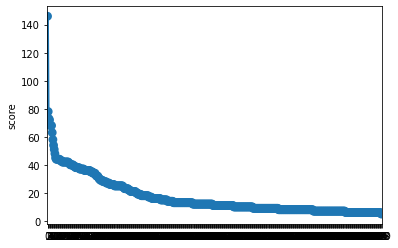

In [90]:
sns.pointplot(x=overlapped_all_score_table.head(500).index,y=overlapped_all_score_table.head(500).score)
overlapped_all_score_table.head(500).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_overlapall_gene_500.txt', index=False)
overlapped_all_score_table.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_overlapall_500.txt', index=False)


In [91]:
test_score_table.head(500).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_all_score_500_gene.txt', index=False)
test_score_table.head(500).to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_all_score_table_500.txt', index=False, sep=' ')

test_score_table.head(1000).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_all_score_1000_gene.txt', index=False)
test_score_table.head(1000).to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_all_score_table_1000.txt', index=False, sep=' ')


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


In [93]:
test_score_table.geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_all_score_all_gene.txt', index=False)
test_score_table.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_all_score_table_all.txt', index=False, sep=' ')


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [92]:
all_score_table.head(300).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/all_gene_rocWeight_300.txt', index=False)
all_score_table.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/all_table_rocWeight_all.txt', index=False)


NameError: name 'all_score_table' is not defined

In [ ]:
complete_score_table.head(300).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/complete_gene_rocWeight_300.txt', index=False)
# complete_score_table.head(300).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/complete_score_table_up1000.txt')
complete_score_table.head(500).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/complete_gene_rocWeight_500.txt', index=False)
complete_score_table.head(1000).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/complete_gene_rocWeight_1000.txt', index=False)
complete_score_table.head(300).to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/complete_table_rocWeight_300.txt', index=False)
# complete_score_table.head(300).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/complete_score_table_up1000.txt')
complete_score_table.head(500).to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/complete_table_rocWeight_500.txt', index=False)
complete_score_table.head(1000).to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/complete_table_rocWeight_1000.txt', index=False)


In [ ]:
from venn import venn
%matplotlib inline
gene_dict = {
    "complete_score_table": set(complete_score_table.head(100).geneName),
    "test_score_table": set(test_score_table.head(100).geneName),
    "high_score_table": set(high_score_table.head(100).geneName),
    'all_score_table':set(all_score_table.head(100).geneName)
}
venn(gene_dict)

In [ ]:
complete_score_table_40[complete_score_table_40.gene.isin(complete_score_table_40.gene)].shape

In [ ]:
vahid_table = pd.read_excel('/Volumes/Work/Vahid_work/classification_newcode_data/final_result_plot/data_supplementary/Progress_tracker.xlsx',sheet_name='Sheet2')
vahid_table.head()

In [ ]:
print(test_score_table_45[test_score_table_45.gene.isin(vahid_table.id)].shape)
print(all_score_table_45[all_score_table_45.gene.isin(vahid_table.id)].shape)
print(high_score_table_45[high_score_table_45.gene.isin(vahid_table.id)].shape)
print(mid_score_table_45[mid_score_table_45.gene.isin(vahid_table.id)].shape)
print(complete_score_table_45[complete_score_table_45.gene.isin(vahid_table.id)].shape)

In [ ]:
xp_network = pd.read_csv('/Volumes/Work/r_note/asd_transcriptional_organization-master/rawData/networks/XP_networks/rawData/XP_func_anno.csv')
print(xp_network[xp_network['Entrez Gene ID'].isin(test_score_table.head(100).gene)].shape)
print(xp_network[xp_network['Entrez Gene ID'].isin(all_score_table.head(100).gene)].shape)
print(xp_network[xp_network['Entrez Gene ID'].isin(high_score_table.head(100).gene)].shape)
print(xp_network[xp_network['Entrez Gene ID'].isin(mid_score_table.head(100).gene)].shape)
print(xp_network[xp_network['Entrez Gene ID'].isin(complete_score_table.head(100).gene)].shape)

In [ ]:
name_prefix = 'complete_score_table_'
for i in [50,100,500,1000]:
    complete_score_table.head(i).to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/final_result_plot/'+name_prefix+str(i)+'.csv')
name_prefix = 'all_score_table_'
for i in [50,100,500,1000]:
    all_score_table.head(i).to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/final_result_plot/'+name_prefix+str(i)+'.csv')
      
        

In [ ]:
np.median(complete_score_table.counts)

In [ ]:
name_prefix = 'all_score_table_'
all_score_table.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/final_result_plot/'+name_prefix+'all.csv')

In [ ]:
name_prefix = 'complete_score_table_'

complete_score_table.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/final_result_plot/'+name_prefix+'all.csv')

In [ ]:
xp_network[xp_network['Entrez Gene ID'].isin(mid_score_table_45.gene)][['annotation name','gene name','annotations']]

In [ ]:
def get_count(_table_dict, xp_network):
    a20 = xp_network[xp_network['Entrez Gene ID'].isin(_table_dict.head(20).gene)].shape[0]
    a50 = xp_network[xp_network['Entrez Gene ID'].isin(_table_dict.head(50).gene)].shape[0]
    a100 = xp_network[xp_network['Entrez Gene ID'].isin(_table_dict.head(100).gene)].shape[0]
    a500 = xp_network[xp_network['Entrez Gene ID'].isin(_table_dict.head(500).gene)].shape[0]
    return a20, a50, a100, a500

print(get_count(test_score_table, xp_network))
print(get_count(complete_score_table, xp_network))
print(get_count(mid_score_table, xp_network))
print(get_count(all_score_table, xp_network))


In [ ]:
import seaborn as sns
akk = pd.DataFrame(data={'classifier':[len(test_feature_method_dict[i]) for i in overlapped_route_dict_list], 
                         'gene_weight':feature_list})
sns.stripplot('classifier', 'gene_weight', data=akk, jitter=0.4, size=3)
sns.kdeplot(data=akk)
sns.despine()
    

In [ ]:
# Only pick the genes that exists in more than 60% of the features, pick gene that exist in 0.8 pick genes that exists in every set


# test the LD overlap with main

In [ ]:
_the_table_ld = pd.read_csv('/Volumes/Work/Vahid_work/classification_newcode_data/final_testDataset_HT12_LD/roc_mean.csv', index_col=0)
_the_table_ld = _the_table_ld.drop('sqda', axis=1)
ld_feature_method_dict = {}               
route_list_ld = []
ld_feature_classifier = [[],[]]

for i in _the_table_ld.index.tolist():
    _name = "_".join(i.split("_")[1:])
    for j in _the_table_ld.columns.tolist():
        if _the_table_ld.loc[i,j] > 0.8:
            if _name not in ld_feature_method_dict.keys():
                ld_feature_method_dict[_name] = [j]
            else:
                ld_feature_method_dict[_name].append(j)
        ld_feature_classifier[0].append("@".join([_name,j]))
        ld_feature_classifier[1].append(_the_table_ld.loc[i,j])
route_list_ld = list(ld_feature_method_dict.keys())

with open('/Volumes/Work/Vahid_work/classification_newcode_data/final_testDataset_HT12_LD/feature.json') as f:
    data_ld = json.load(f)
ld_temp_dict = {}
for i in data_ld:
    name = "_".join(i['method'][0].split('_')[1:])
    if name not in ld_temp_dict.keys():
        ld_temp_dict[name]=[i['features']]
    else:
        ld_temp_dict[name].append(i['features'])


In [ ]:
the_overlap_ld = sorted(list(set(main_feature_list).intersection(set(route_list_ld))))
len(the_overlap_ld)  

In [ ]:

ld_feature_table = pd.DataFrame(data={"ld_feature": ld_feature_classifier[0], 'ld_roc':ld_feature_classifier[1]})
print(ld_feature_table.shape)
main_feature_table = pd.DataFrame(data={"main_feature": main_feature_classifier[0], 'main_roc':main_feature_classifier[1]})
print(main_feature_table.shape)
main_feature_table = main_feature_table[main_feature_table.main_feature.isin(ld_feature_table.ld_feature)]
main_feature_table = main_feature_table.sort_values(by="main_feature").reset_index(drop=True)
print(main_feature_table.shape)
ld_feature_table = ld_feature_table[ld_feature_table.ld_feature.isin(main_feature_table.main_feature)]
ld_feature_table = ld_feature_table.sort_values(by="ld_feature").reset_index(drop=True)
print(ld_feature_table.shape)

# longitudinal

In [ ]:
_the_table_long = pd.read_csv('/Volumes/Work/Vahid_work/classification_newcode_data/final_testDataset_HT12_longitudinal/roc_mean.csv', index_col=0)
_the_table_long = _the_table_long.drop('sqda', axis=1)
long_feature_method_dict = {}               
route_list_long = []
long_feature_classifier = [[],[]]

for i in _the_table_long.index.tolist():
    _name = "_".join(i.split("_")[1:])
    for j in _the_table_long.columns.tolist():
        if _the_table_long.loc[i,j] > 0.8:
            if _name not in long_feature_method_dict.keys():
                long_feature_method_dict[_name] = [j]
            else:
                long_feature_method_dict[_name].append(j)
        long_feature_classifier[0].append("@".join([_name,j]))
        long_feature_classifier[1].append(_the_table_long.loc[i,j])
route_list_long = list(long_feature_method_dict.keys())

with open('/Volumes/Work/Vahid_work/classification_newcode_data/final_testDataset_HT12_longitudinal/feature.json') as f:
    data_long = json.load(f)
long_temp_dict = {}
for i in data_long:
    name = "_".join(i['method'][0].split('_')[1:])
    if name not in long_temp_dict.keys():
        long_temp_dict[name]=[i['features']]
    else:
        long_temp_dict[name].append(i['features'])


In [ ]:
the_overlap_long = sorted(list(set(main_feature_list).intersection(set(route_list_long))))
len(the_overlap_long)  

In [ ]:
long_feature_table = pd.DataFrame(data={"long_feature": long_feature_classifier[0], 'long_roc':long_feature_classifier[1]})
print(long_feature_table.shape)
main_feature_table = pd.DataFrame(data={"main_feature": main_feature_classifier[0], 'main_roc':main_feature_classifier[1]})
print(main_feature_table.shape)
main_feature_table = main_feature_table[main_feature_table.main_feature.isin(long_feature_table.long_feature)]
main_feature_table = main_feature_table.sort_values(by="main_feature").reset_index(drop=True)
print(main_feature_table.shape)
long_feature_table = long_feature_table[long_feature_table.long_feature.isin(main_feature_table.main_feature)]
long_feature_table = long_feature_table.sort_values(by="long_feature").reset_index(drop=True)
print(long_feature_table.shape)

In [ ]:
merged_table = pd.concat([long_feature_table, main_feature_table], axis=1).dropna()
merged_table = merged_table[~(merged_table == 0).any(axis=1)]
import seaborn as sns
sns.scatterplot(data=merged_table, x="long_roc", y="main_roc", s=10)
sns.kdeplot(data=merged_table[["long_roc", "main_roc"]])

In [ ]:
temp_LW_report = pd.read_csv('/Volumes/Work/Autism/data_910/LWReport_04182020_updated.csv', header=0)

In [ ]:
temp_LW_report.recentDxJ_ageMo

In [ ]:
temp_LW_report.recentDxJ_dxCode.value_counts()

In [ ]:
recentDxJ_dxCode_dict = {'ASD':'ASD',
'TD':'TD',
'LD':'LD',
'Other':'Other',
'DD':'GDD',
'ASD Features':'ASD Features',
'ASD Features ':'ASD Features',
'Typ Sib ASD':'TypSibASD',
'PrevLDDTyp':'TD',
'GDD':'GDD',
'PDDNOS':'ASD',
'FMD':'Other',
'PrevDDTyp':'TD',
'MD':'Other',
'DROPPED':'Dropped',
'ADHD':'Other',
'PrevASDTyp':'ASD',
'Dropped':'Dropped',
'ASD Features':'Other',
'Aspergers':'Other'}

subject_dx_dict = {}
for i,j in zip(temp_LW_report.subjectid.tolist(), temp_LW_report.recentDxJ_dxCode.tolist()):
    if type(j) is str:
        subject_dx_dict[i] = recentDxJ_dxCode_dict[j]

In [ ]:
ados_table = temp_LW_report[['subjectid','ados_CoSoTot_1','ados_CoSoTot_2','ados_CoSoTot_3', 'ados_CoSoTot_4','ados_CoSoTot_5']]
ados_table.head()

mullen_table = temp_LW_report[['subjectid','mullen_ELC_Std_1','mullen_ELC_Std_2','mullen_ELC_Std_3', 'mullen_ELC_Std_4','mullen_ELC_Std_5']]
mullen_table.head()

mullen_table_1 = temp_LW_report[['subjectid','mullen_ELC_Std_1','mullen_ELC_Std_2','mullen_ELC_Std_3', 'mullen_ELC_Std_4','mullen_ELC_Std_5']]
mullen_table.head()

# CSBS_sub1_social_2
# CSBS_sub2_expressive_2
# CSBS_sub3_symbolic_2
# CSBS_total_score_2
# mullen_ELT_1
# ados_RRTot_1
# ados_CoSoTotRRTot_1

In [ ]:
# subject_ados_score = {}
# for i in ados_table.index.tolist():
#     for j in ['ados_CoSoTot_5','ados_CoSoTot_4','ados_CoSoTot_3','ados_CoSoTot_2','ados_CoSoTot_1']:
#         if np.isnan(ados_table.loc[i,j]):
#             continue
#         else:
# #             subject_id_list.append(cutted_table.subjectid[i])
# #             thelast_asd_list.append(cutted_table.loc[i,j])
#             subject_ados_score[ados_table.subjectid[i]] = ados_table.loc[i,j]
#             break
# subject_mullen_score = {}
# for i in mullen_table.index.tolist():
#     for j in ['mullen_ELC_Std_5','mullen_ELC_Std_4','mullen_ELC_Std_3','mullen_ELC_Std_2','mullen_ELC_Std_1']:
#         if np.isnan(mullen_table.loc[i,j]):
#             continue
#         else:
# #             subject_id_list.append(cutted_table.subjectid[i])
# #             thelast_asd_list.append(cutted_table.loc[i,j])
#             subject_mullen_score[mullen_table.subjectid[i]] = mullen_table.loc[i,j]
#             break
        
# for i in mullen_table.index.tolist():
#     for j in ['mullen_ELC_Std_5','mullen_ELC_Std_4','mullen_ELC_Std_3','mullen_ELC_Std_2','mullen_ELC_Std_1']:
#         if np.isnan(mullen_table.loc[i,j]):
#             continue
#         else:
# #             subject_id_list.append(cutted_table.subjectid[i])
# #             thelast_asd_list.append(cutted_table.loc[i,j])
#             subject_mullen_score[mullen_table.subjectid[i]] = mullen_table.loc[i,j]
#             break
        
# age_dict={}
# for i in temp_LW_report.index.tolist():
#     age_dict[temp_LW_report.subjectid[i]] = temp_LW_report.recentDxJ_ageMo[i]